In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.random as npr
import pandas_datareader as pdr
from pandas_datareader import data as pdr
import math
import yfinance as yf


In [6]:
yf.pdr_override()

In [7]:
End = dt.datetime.now()
Start = dt.datetime(2017,1,1)
BN = pdr.get_data_yahoo('^NSEBANK', Start, End)
Close_price = BN.Close
Close_price.head()


[*********************100%***********************]  1 of 1 completed


Date
2017-01-03    18035.599609
2017-01-04    17891.000000
2017-01-05    18115.949219
2017-01-06    18264.000000
2017-01-09    18286.650391
Name: Close, dtype: float64

In [8]:
Returns = np.log(BN.Close/BN.Close.shift(1)).dropna()
Returns.head()

Date
2017-01-04   -0.008050
2017-01-05    0.012495
2017-01-06    0.008139
2017-01-09    0.001239
2017-01-10    0.006701
Name: Close, dtype: float64

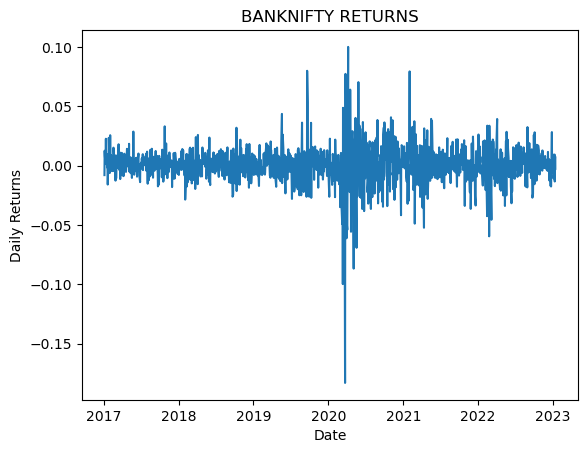

In [9]:
plt.plot(Returns)
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.title('BANKNIFTY RETURNS')
plt.show()

<AxesSubplot: xlabel='Date'>

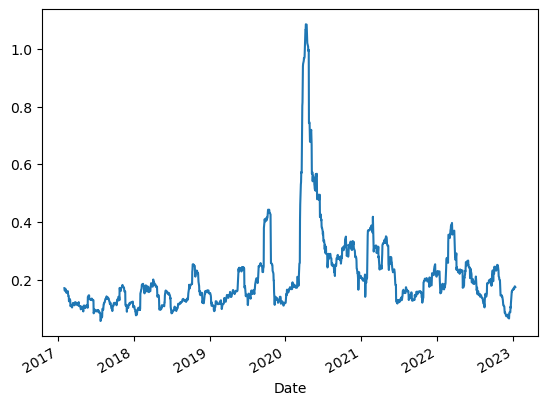

In [10]:
##Volatility Calculation
TRADING_DAYS = 20
volatility = Returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
volatility.plot()

In [11]:
#Blackscholes Merton Model
S0 = 43921
R = 0.06
Sm = 0.15 #sigma
T = 1
I = 20000
K = 44000


In [12]:
def gbm_mcs_stat(K):
    I = 10000
M = 100
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((R - 0.5 * Sm ** 2) * dt + Sm * math.sqrt(dt) * npr.standard_normal(I))
    hT = np.maximum(S[t] - K, 0)
    C0 = math.exp(-R * T) * np.mean(hT)
    print (C0)
    gbm_mcs_stat(K=44000)

222.7751033614806
338.5398382752995
425.07796343381517
501.17397495365486
576.1611537799135
639.7186991266947
701.6174223739554
758.7880977857777
820.6956214680232
874.5208048511206
927.4168234741034
978.8714664718127
1029.2572824917875
1081.5234568566116
1129.5073641278113
1172.044883962937
1222.0908572848302
1268.72143694961
1314.704121301839
1359.4287385931175
1399.7850947451993
1433.9550134853991
1473.5622923311728
1510.6234317923877
1549.9611763565342
1590.5689463375431
1626.1681698890877
1662.4318488253316
1695.2941789731017
1738.0354101637413
1771.4343795555887
1804.3323658506563
1842.1209874961094
1875.2231343836022
1912.2594798439154
1948.4013487726436
1979.980306397241
2015.5232262700895
2046.96889603326
2078.531690456257
2119.893277324594
2150.8481713632455
2186.2506469106897
2219.1595668378245
2251.2370174170683
2287.540356612967
2321.104565142371
2357.0933263344114
2390.4955834833822
2421.6022552817203
2460.7543930135985
2493.814490127667
2527.1014955649157
2563.4624264098

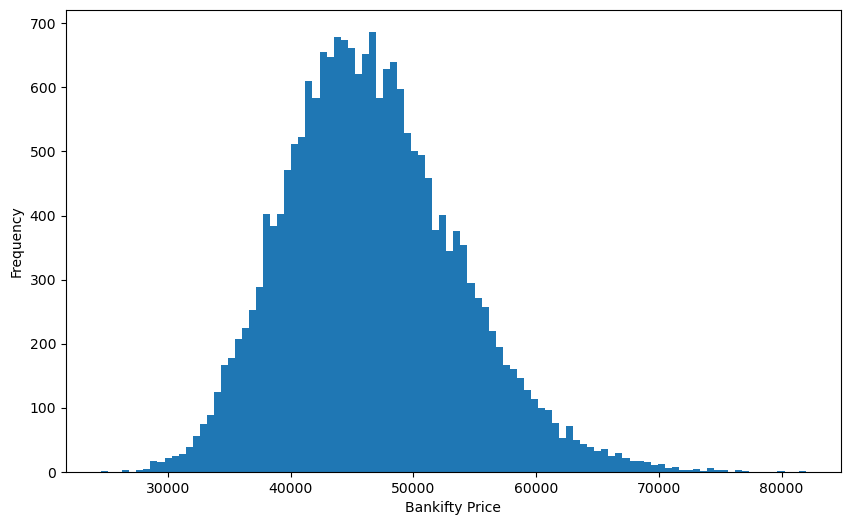

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=100)
plt.xlabel('Bankifty Price')
plt.ylabel('Frequency');
